In [54]:
import numpy as np
import random 

import matplotlib.pyplot as plt 

from keras.models import Sequential  
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [42]:
data_train = np.load('kmnist-train-imgs.npz')
labels_train = np.load('kmnist-train-labels.npz')
data_test = np.load('kmnist-test-imgs.npz')
labels_test = np.load('kmnist-test-labels.npz')

In [43]:
k_train_samples = data_train['arr_0']
k_train_labels = labels_train['arr_0']
k_test_samples = data_test['arr_0']
k_test_labels = labels_test['arr_0']

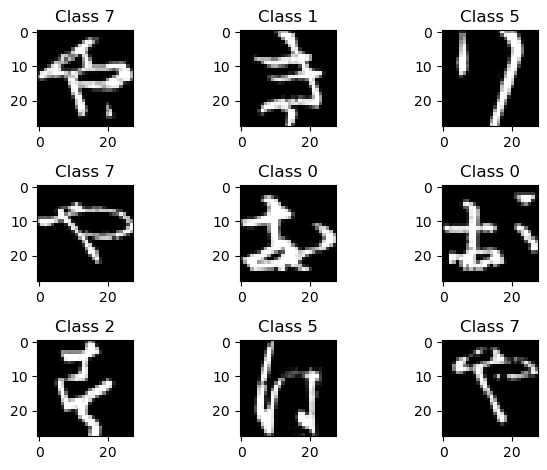

In [44]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(k_train_samples))
    plt.imshow(k_train_samples[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(k_train_labels[num]))
    
plt.tight_layout()

In [45]:
X_train = k_train_samples.reshape(60000, 784) 
X_test = k_test_samples.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [46]:
no_classes = 10

Y_train = utils.to_categorical(k_train_labels, no_classes)
Y_test = utils.to_categorical(k_test_labels, no_classes)

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(i*10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()
#model.append(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 80)                432720    
                                                                 
 dense_3 (Dense)             (None, 10)                810       
                                                                 
Total params: 433850 (1.66 MB)
Trainable params: 433850 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [28]:
#from keras.utils import plot_model
#plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
#from IPython.display import Image
#Image("model_chart.png")

In [29]:
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
callback = EarlyStopping(monitor='loss', patience=1, min_delta=0.1)
history = model.fit(X_train, Y_train,
              batch_size=128, epochs=10,
              verbose=1, callbacks=[callback])

Epoch 1/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0175 - accuracy: 0.9953


In [50]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.9267
Test accuracy: 0.9266999959945679


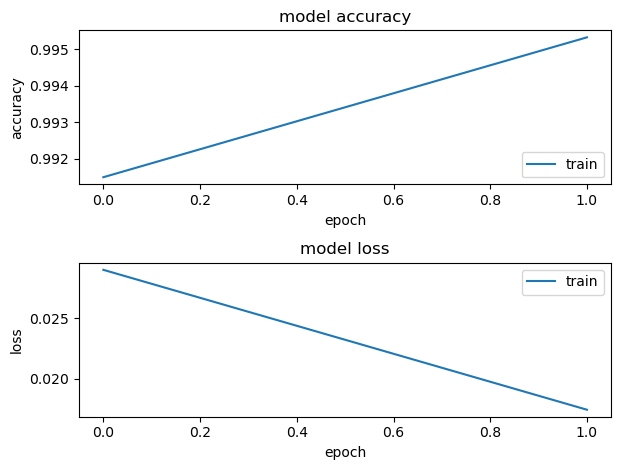

In [51]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [52]:
results = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9267
Weighted Precision: 0.9286617915767793
Weighted Recall: 0.9267
Weighted F1 Score: 0.9267973228528681


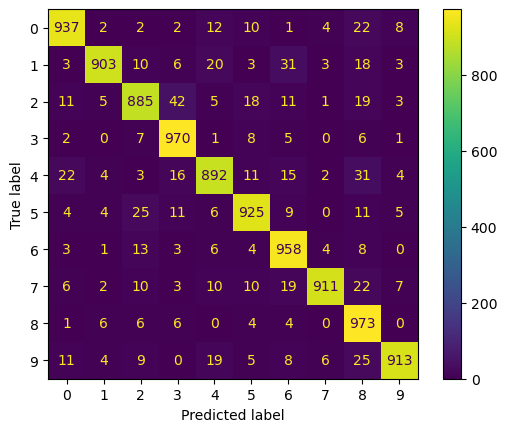

In [59]:
predicted_classes = model.predict(X_test)

true_labels = np.argmax(Y_test,axis=1)

predicted_labels = np.argmax(predicted_classes,axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))
print("Weighted Precision: " + str(precision_score(true_labels, predicted_labels, average='weighted')))
print("Weighted Recall: " + str(recall_score(true_labels, predicted_labels, average='weighted')))
print("Weighted F1 Score: " + str(f1_score(true_labels, predicted_labels, average='weighted')))

### Extensions to the project
1. Alter parameters of layers (Number of perceptrons, more Convolution and pooling layers) 
2. Preprocessing on the data (filter?)
3. Ensemble learning
4. Utilize Graphcore IPU